In [44]:
import pandas as pd 
import numpy as np

import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace import sarimax
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Time Series Data.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.shape

(105, 2)

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [6]:
df.columns = ['time','sales']

In [7]:
df.head()

,time,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [8]:
# For any time series data the datatype of the time column has to be pd.datetime If it is not in datetime format convert it into datetime format

In [9]:
df.dtypes

time     object
sales     int64
dtype: object

In [10]:
df['time'] = pd.to_datetime(df['time'])

In [11]:
df.dtypes

time     datetime64[ns]
sales             int64
dtype: object

In [12]:
df.head()

,time,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [13]:
df['time'].unique()

array(['1964-01-01T00:00:00.000000000', '1964-02-01T00:00:00.000000000',
       '1964-03-01T00:00:00.000000000', '1964-04-01T00:00:00.000000000',
       '1964-05-01T00:00:00.000000000', '1964-06-01T00:00:00.000000000',
       '1964-07-01T00:00:00.000000000', '1964-08-01T00:00:00.000000000',
       '1964-09-01T00:00:00.000000000', '1964-10-01T00:00:00.000000000',
       '1964-11-01T00:00:00.000000000', '1964-12-01T00:00:00.000000000',
       '1965-01-01T00:00:00.000000000', '1965-02-01T00:00:00.000000000',
       '1965-03-01T00:00:00.000000000', '1965-04-01T00:00:00.000000000',
       '1965-05-01T00:00:00.000000000', '1965-06-01T00:00:00.000000000',
       '1965-07-01T00:00:00.000000000', '1965-08-01T00:00:00.000000000',
       '1965-09-01T00:00:00.000000000', '1965-10-01T00:00:00.000000000',
       '1965-11-01T00:00:00.000000000', '1965-12-01T00:00:00.000000000',
       '1966-01-01T00:00:00.000000000', '1966-02-01T00:00:00.000000000',
       '1966-03-01T00:00:00.000000000', '1966-04-01

In [14]:
df.set_index('time',inplace=True) 

In [15]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Checking if data is stationary or non-stationary

<AxesSubplot:xlabel='time'>

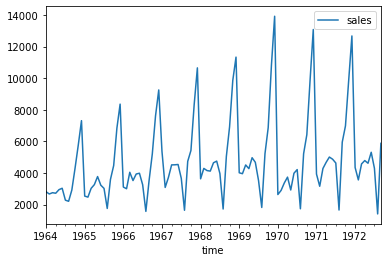

In [16]:
df.plot()

### Performing AD Fuller test to find if data is stationary or non-stationary

In [17]:
# AD Fuller test comes with certain hypothesis
# 1. H0 (Null hypothesis) : the null hypothesis of this test is that the time series is non-stationary
# 2. H1 (Al##ternate hypothesis) : the alternate hypothesis of this test is that the time series is stationary

In [18]:
adf = adfuller(df['sales'])

In [19]:
adf

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
# 1st = adf test statistics
# 2nd = pvalue(threshold 0.05)
# 3rd = no of lags
# 4th = no of obs

#### Analysis:
    Since the pvalue is greater than 0.05 we accept the null hypothesis i.e. data is non-stationary

## Using the first difference to make the data stationary

In [21]:
df['first_difference'] = df['sales'] - df['sales'].shift(1)

In [22]:
adf = adfuller(df['first_difference'].dropna())

In [23]:
adf

(-7.1898964480510195,
 2.519620447386778e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915888)

#### Analysis:
    As the pvalue is lesser than 0.05 we reject the null hypothesis i.e. data is stationary

#### Conclusion:
    The time series is now stationary

<AxesSubplot:xlabel='time'>

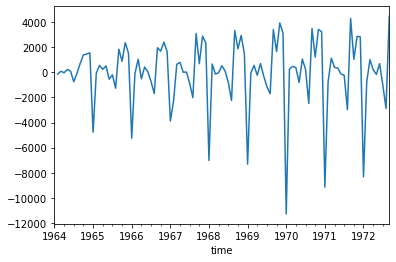

In [24]:
df['first_difference'].plot()

### Analysis:
    From the above graphs we can conclude the graphs has seasonality

In [25]:
df['seasonal_difference'] = df['sales'] - df['sales'].shift(12)

<AxesSubplot:xlabel='time'>

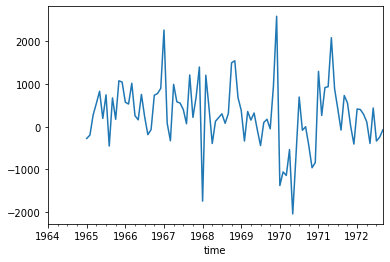

In [26]:
df['seasonal_difference'].plot()

In [27]:
# In order to fit any integrated time series model we need to have 3 values
# p - AR model
# q - Moving avg
# d - difference to make it stationary

# To determine the value of p,q,d we use ACF and PACF plots
# ACF stands for Auto Correlation Funtion and hence we see the value of p from the plot
# PACF stands for Partial Auto Correlation Function and hence we see the q value form the plot

## ACF plot

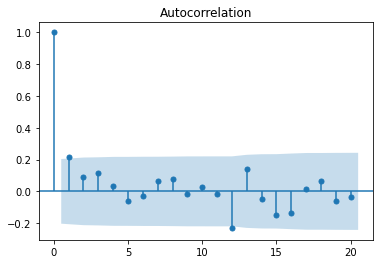

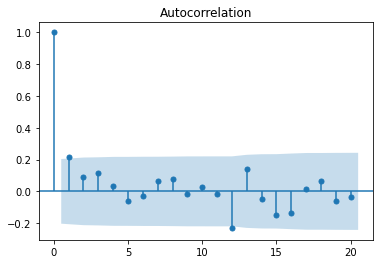

In [28]:
plot_acf(df['seasonal_difference'].dropna())

In [1]:
#In the ACF plot we are suppposed to see the no of bars after which there is smooth fall.The smooth fall is after 1 then the q value is 1

## PACF plot

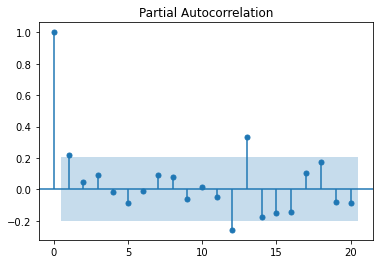

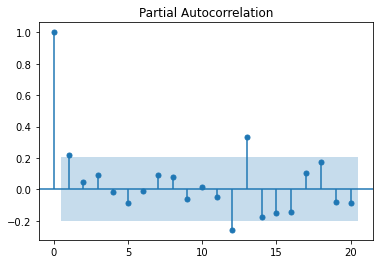

In [30]:
plot_pacf(df['seasonal_difference'].dropna())

In [2]:
# p value is one

### Analysis:
    From the above analysis we conclude that the p,q and d values are 1,1,1

## Fitting ARIMA

In [32]:
model_arima = ARIMA(df['sales'],order=(1,1,1))

In [33]:
arima = model_arima.fit()

In [34]:
df['forecast'] = arima.predict(start=90,end=105,dynamic=True)

<AxesSubplot:xlabel='time'>

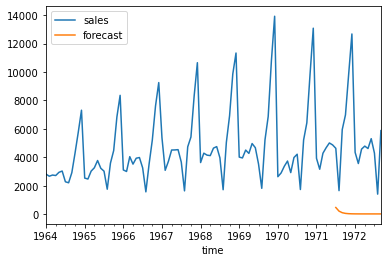

In [35]:
df[['sales','forecast']].plot()

## Implementing sarimax

In [36]:
model_sarima = sarimax.SARIMAX(df['sales'],order=(1,1,1),seasonal_order = (1,1,1,12))

In [37]:
sarima = model_sarima.fit()

In [38]:
df['sarima_forecast'] = sarima.predict(start=90,end=105,dynamic=True)

<AxesSubplot:xlabel='time'>

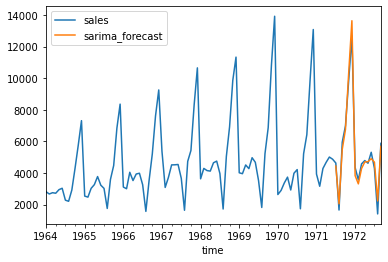

In [40]:
df[['sales','sarima_forecast']].plot()

In [45]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [48]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [49]:
new_df = pd.DataFrame(index= future_dates[1:],columns=df.columns)

In [50]:
new_df

,sales,first_difference,seasonal_difference,forecast,sarima_forecast
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [51]:
forecast_df = pd.concat([df,new_df])

In [53]:
forecast_df['sarima_forecast'] = sarima.predict(start=102,end=130,dynamic=True)

<AxesSubplot:>

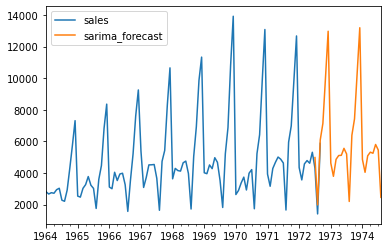

In [54]:
forecast_df[['sales','sarima_forecast']].plot()